## 3.3 Application

#### Importing necessary libraries

In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import csv
import plotly.graph_objs as go  
from sklearn.feature_extraction.text import CountVectorizer
import chart_studio.plotly as py
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Cufflinks connects Plotly with pandas to produce the interactive data visualizations.
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#### The reviews collected for 3.2 are stored in a csv file after performing co-referencing on them

In [2]:
df = pd.read_csv('resolved_data.csv')
df = df.iloc[:, [1]]
df = pd.DataFrame(df)
# df.rename(columns = {0:'text'}, inplace = True) 
text_doc = ' '.join(df.resolved)
df

,resolved
0,"Visit: Weekend Brunch, Saturday, Nov. 14, 201..."
1,The view is great. The view is overlooking the...
2,First time visitor this past Sunday. I took m...
3,The Good:\nexcellent tasting food\nhealthy cho...
4,One of the best museum Cafes around! My family...
5,The restaurant did have a positive vibe. one o...
6,"Love this place. One of our secret ""locals"" sp..."
7,I've been up here about 5 times now and the la...
8,Talk about a hidden gem! My friend and I came ...
9,Love this place \nFood is great\nLove the grea...


#### The Sentiment of each review is calculated using TextBlob. Based on the polarity, we can determine whether it is a positive text or negative or neutral. For TextBlog, if the polarity is >0, it is considered positive, <0 -is considered negative and == 0 is considered neutral.

#### The Length and Word Count of each review is also obtained for further analysis

In [15]:
df['polarity'] = df['resolved'].map(lambda text: TextBlob(text).sentiment.polarity)
df['len'] = df['resolved'].astype(str).apply(len)
df['word_count'] = df['resolved'].apply(lambda x: len(str(x).split()))

df

,resolved,polarity,len,word_count
0,"Visit: Weekend Brunch, Saturday, Nov. 14, 201...",0.374058,919,163
1,The view is great. The view is overlooking the...,0.370833,309,57
2,First time visitor this past Sunday. I took m...,-0.232143,606,113
3,The Good:\nexcellent tasting food\nhealthy cho...,0.188290,423,66
4,One of the best museum Cafes around! My family...,0.258400,787,140
5,The restaurant did have a positive vibe. one o...,0.550884,463,83
6,"Love this place. One of our secret ""locals"" sp...",0.261354,697,124
7,I've been up here about 5 times now and the la...,0.400000,499,88
8,Talk about a hidden gem! My friend and I came ...,0.353855,468,84
9,Love this place \nFood is great\nLove the grea...,0.639286,165,30


#### The distribution of review sentiment polarity score

In [16]:
layout = go.Layout(
        xaxis=dict(
            range=[-1, 1],
            title='polarity'
        ),
        yaxis=dict(
            range=[0, 8],
            title='count'
        ),
        title='Frequency of Sentiment Polarity Distribution'
    )
df['polarity'].iplot(
    kind='hist',
    bins=12,
    linecolor='black',
    layout = layout)

#### Sentiment Polarity Distribution of Reviews

In [17]:
layout = go.Layout(
        yaxis=dict(
            range=[-1, 1],
            title='polarity'
        ),
        xaxis=dict(
            title='of text'
        ),
        title='Sentiment Polarity Distribution'
    )
df['polarity'].iplot(
    kind='box',
    linecolor='black',
    layout = layout)

#### The distribution review text lengths

In [18]:
layout = go.Layout(
        xaxis=dict(
            range=[0, 1100],
            title='review length'
        ),
        yaxis=dict(
            range=[0, 10],
            title='count'
        ),
        title='Review Text Length Distribution'
    )

df['len'].iplot(
    kind='hist',
    bins=25,
    linecolor='black',
    layout=layout)

#### The distribution review text lengths

In [19]:
layout = go.Layout(
        xaxis=dict(
            range=[0, 200],
            title='word count'
        ),
        yaxis=dict(
            range=[0, 10],
            title='count'
        ),
        title='Review Text Word Count Distribution'
    )

df['word_count'].iplot(
    kind='hist',
    bins=25,
    linecolor='black',
    layout=layout)

#### Get the frequency of each word and get the top 20 frequent words

In [20]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['resolved'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['resolved' , 'count'])


food 38
great 33
good 31
view 27
kids 21
preserve 16
springs 15
cafe 15
service 13
love 12
place 11
menu 11
lunch 11
friendly 9
excellent 9
divine 9
vegas 9
drinks 9
time 8
perfect 8


In [21]:
df2.groupby('resolved').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

#### Get Bigram to see the most common pairs

In [22]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['resolved'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['resolved' , 'count'])



great view 12
springs preserve 10
divine cafe 7
good drinks 7
great food 6
good view 6
good food 6
happy hour 6
kids mac 6
mac cheese 6
food great 5
friendly staff 4
food good 4
year old 4
springs cafe 4
monte cristo 4
outdoor seating 3
view great 3
having lunch 3
eaten cafe 3


In [23]:
df4.groupby('resolved').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

#### Review POS tags for reviews

In [24]:
blob = TextBlob(str(df['resolved']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

#### After summarizing the text, the word cloud consists of the most significant keywords that appear in the reviews with positive sentiment

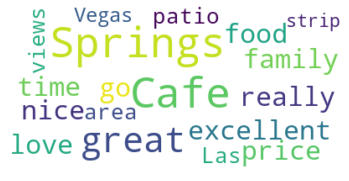

In [29]:
text = df['resolved']

for i in range(len(text)):
    if df['polarity'][i] > 0:
        wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text[i])
    else:
        wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text[i])

plt.figure()
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

#### After summarizing the text, the word cloud consists of the most significant keywords that appear in the reviews with negative sentiment

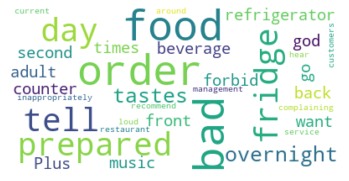

In [30]:
plt.figure()
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()